In [2]:
import kagglehub
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules
from fuzzywuzzy import process
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet import Prophet

c:\Users\sravan\Downloads\college major project\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\sravan\Downloads\college major project\.venv\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
Importing plotly failed. Interactive plots will not work.


In [3]:
path = kagglehub.dataset_download("shivamb/netflix-shows")
print("dataset downloaded", path)

dataset downloaded C:\Users\sravan\.cache\kagglehub\datasets\shivamb\netflix-shows\versions\5


In [4]:
df = pd.read_csv(r'netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.shape

(8807, 12)

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
imp = ["director", "cast", 'country', 'rating', 'duration']
for i in imp:
    df[i].fillna("unkown", inplace=True)
df['date_added'].fillna("Unknown Date", inplace=True)

C:\Users\sravan\AppData\Local\Temp\ipykernel_15152\2583238204.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna("unkown", inplace=True)
C:\Users\sravan\AppData\Local\Temp\ipykernel_15152\2583238204.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [9]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unkown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unkown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unkown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unkown,unkown,unkown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unkown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
df['listed_in'] = df['listed_in'].str.split(', ')
df['cast'] = df['cast'].str.split(', ')

In [12]:
df['listed_in'] = df['listed_in'].astype(str).str.split(', ')
df['country'] = df['country'].astype(str)
df['rating'] = df['rating'].astype(str)
df['director'] = df['director'].astype(str)

df['transaction'] = df.apply(
    lambda row: row['listed_in'] + [row['country'], row['rating'], row['director']],
    axis=1
)
transactions = df['transaction'].tolist()


In [13]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_array, columns=te.columns_)

In [14]:
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

if not frequent_itemsets.empty:
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
    print("Association Rules:")
    print(rules)
else:
    print("No frequent itemsets found. Try reducing min_support.")


Frequent Itemsets:
      support                                           itemsets
0    0.022709                                       ('Comedies')
1    0.029976                                      ('Comedies'])
2    0.010333                                     ('Docuseries')
3    0.074259                                         ('Dramas')
4    0.019643                                        ('Dramas'])
..        ...                                                ...
334  0.010106  (unkown, 'TV Dramas'], 'Romantic TV Shows', ['...
335  0.012263  (unkown, TV-14, 'Romantic TV Shows', ['Interna...
336  0.015669  (unkown, TV-14, 'TV Dramas'], ['International ...
337  0.011128   (unkown, TV-MA, 'TV Dramas'], ['Crime TV Shows')
338  0.015783  (unkown, TV-MA, 'TV Dramas'], ['International ...

[339 rows x 2 columns]
Association Rules:
                                          antecedents  \
0                                        ('Comedies')   
1                                       ('Co

In [15]:
filtered_rules = rules[(rules['confidence'] > 0.7) & (rules['lift'] > 1.5)]
print(filtered_rules)


                                          antecedents  \
2                                       ('Comedies'])   
8                              ('Independent Movies')   
16                         ('International TV Shows')   
18                        ('International TV Shows'])   
19                                ('Korean TV Shows')   
..                                                ...   
279  (TV-14, 'TV Dramas'], ['International TV Shows')   
280                             (TV-14, 'TV Dramas'])   
281         (unkown, 'TV Dramas'], ['Crime TV Shows')   
282          (TV-MA, 'TV Dramas'], ['Crime TV Shows')   
284  (TV-MA, 'TV Dramas'], ['International TV Shows')   

                             consequents  antecedent support  \
2          (['Children & Family Movies')            0.029976   
8                            (['Dramas')            0.048144   
16                              (unkown)            0.040309   
18                              (unkown)            0.02520

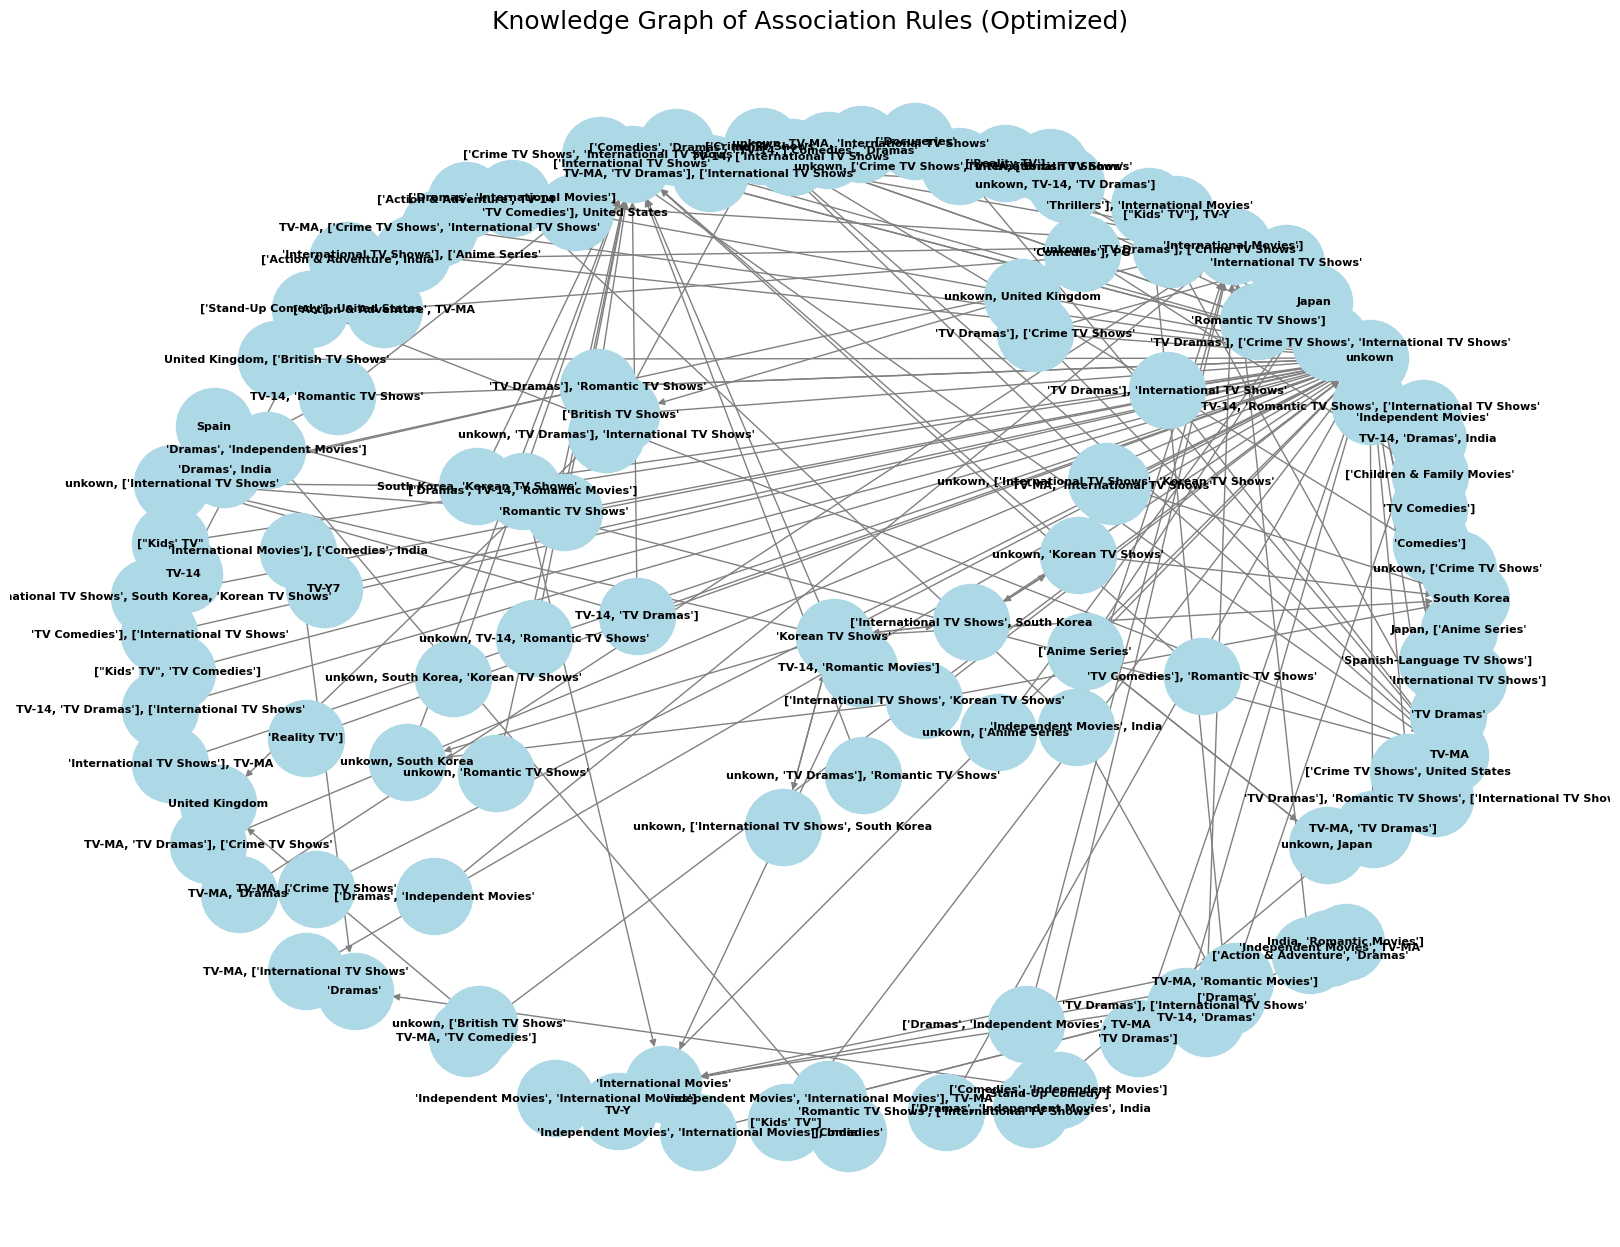

In [16]:
G = nx.DiGraph()

for i, rule in filtered_rules.iterrows():
    G.add_edge(
        ', '.join(list(rule['antecedents'])),
        ', '.join(list(rule['consequents'])),
        weight=rule['lift']
    )


pos = nx.spring_layout(G, k=3.0, iterations=100)


plt.figure(figsize=(16, 12)) 
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    node_size=3000, 
    font_size=8,     
    font_weight='bold'
)

plt.title("Knowledge Graph of Association Rules (Optimized)", fontsize=18)
plt.show()

In [17]:

strong_rules = filtered_rules[(filtered_rules['confidence'] > 0.8) & (filtered_rules['lift'] > 2.0)]
print("Strong Rules:")
print(strong_rules)


Strong Rules:
                                           antecedents  \
8                               ('Independent Movies')   
16                          ('International TV Shows')   
18                         ('International TV Shows'])   
19                                 ('Korean TV Shows')   
21                                 ('Korean TV Shows')   
..                                                 ...   
274  (TV-14, 'Romantic TV Shows', ['International T...   
276                       (TV-14, 'Romantic TV Shows')   
279   (TV-14, 'TV Dramas'], ['International TV Shows')   
282           (TV-MA, 'TV Dramas'], ['Crime TV Shows')   
284   (TV-MA, 'TV Dramas'], ['International TV Shows')   

                             consequents  antecedent support  \
8                            (['Dramas')            0.048144   
16                              (unkown)            0.040309   
18                              (unkown)            0.025207   
19                         (South

In [18]:

top_recommendations = strong_rules.sort_values(by=['confidence', 'lift'], ascending=False).head(10)
print("Top Recommendations:")
print(top_recommendations[['antecedents', 'consequents', 'confidence', 'lift']])


Top Recommendations:
                                           antecedents  \
140                   (South Korea, 'Korean TV Shows')   
152              ('TV Comedies'], 'Romantic TV Shows')   
259           (unkown, South Korea, 'Korean TV Shows')   
86                       ('Independent Movies', India)   
228           (['Dramas', 'Independent Movies', India)   
279   (TV-14, 'TV Dramas'], ['International TV Shows')   
171                              (TV-14, 'TV Dramas'])   
66                                    (['Reality TV'])   
270  ('TV Dramas'], 'Romantic TV Shows', ['Internat...   
272               (unkown, TV-14, 'Romantic TV Shows')   

                     consequents  confidence       lift  
140  (['International TV Shows')    1.000000  11.408031  
152  (['International TV Shows')    1.000000  11.408031  
259  (['International TV Shows')    1.000000  11.408031  
86     ('International Movies'])    1.000000   4.931131  
228    ('International Movies'])    1.000000   4.9

In [19]:
def recommend_for_preference(preference, rules):
    preference = preference.lower().strip()

    recommendations = rules[rules['antecedents'].apply(lambda x: any(preference in str(item).lower() for item in x))]
    
    if recommendations.empty:
        print(f"No recommendations found for '{preference}'")
        return recommendations

    return recommendations[['consequents', 'confidence', 'lift']].sort_values(by='confidence', ascending=False)

user_preference = "comedies"
recommendations = recommend_for_preference(user_preference, strong_rules)

print(f"Recommendations for '{user_preference}':")
print(recommendations)


Recommendations for 'comedies':
                       consequents  confidence       lift
152    (['International TV Shows')    1.000000  11.408031
169                       (unkown)    0.947059   2.728409
32                        (unkown)    0.937008   2.699453
167                       (unkown)    0.936364   2.697597
165                       (unkown)    0.927835   2.673027
67   (['Children & Family Movies')    0.925234  20.893674
164                       (unkown)    0.907895   2.615580
220      ('International Movies'])    0.874214   4.310863
215      ('International Movies'])    0.821918   4.052984


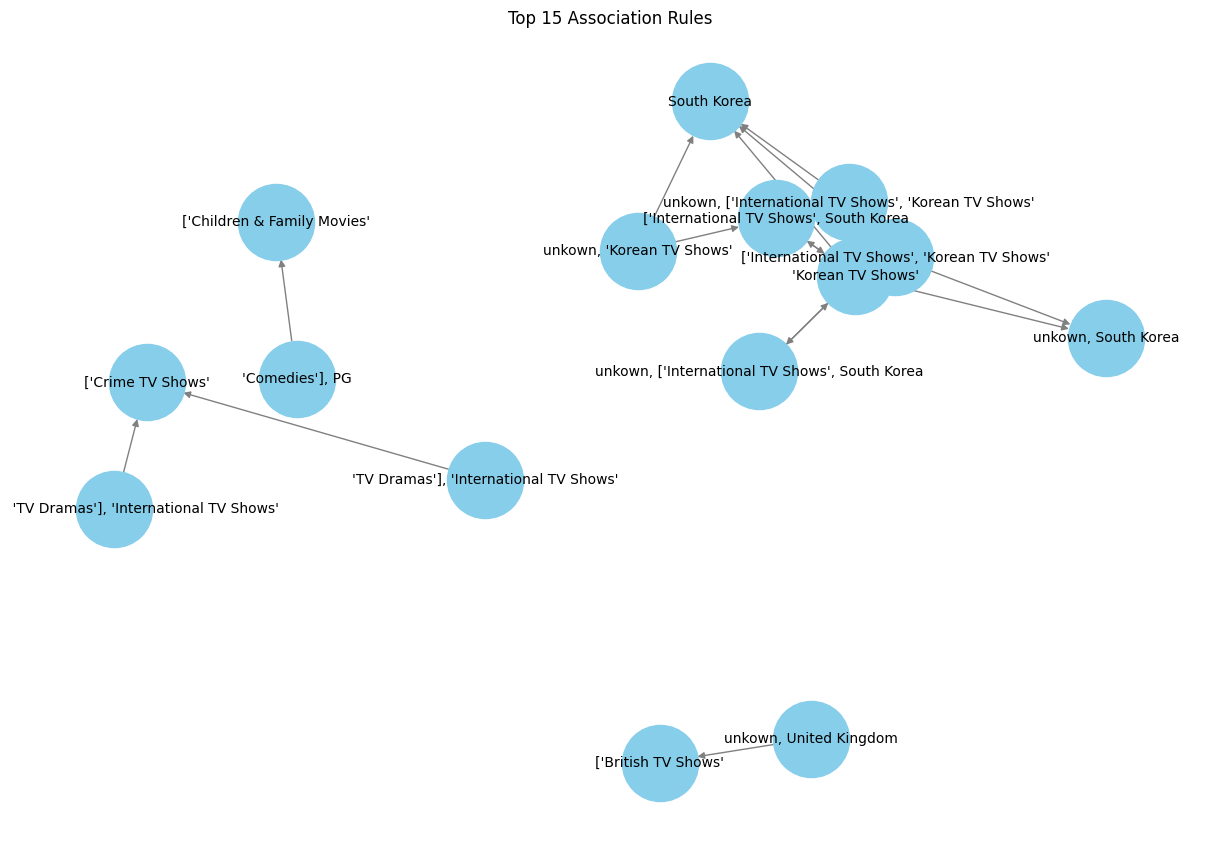

In [20]:

top_rules = strong_rules.sort_values(by=['lift', 'confidence'], ascending=[False, False]).head(15)

G = nx.DiGraph()

for i, rule in top_rules.iterrows():
    antecedents = ', '.join(list(rule['antecedents']))
    consequents = ', '.join(list(rule['consequents']))
    G.add_edge(antecedents, consequents, weight=rule['lift'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=2.0)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=3000, font_size=10)
plt.title("Top 15 Association Rules")
plt.show()


In [21]:
filtered_rules = rules[(rules['confidence'] > 0.5) & (rules['lift'] > 1.2)]

print(f"Filtered Rules Count: {len(filtered_rules)}")

strong_rules = filtered_rules[(filtered_rules['confidence'] > 0.6) & (filtered_rules['lift'] > 1.5)]

print(f"Strong Rules Count: {len(strong_rules)}")


Filtered Rules Count: 285
Strong Rules Count: 196


In [22]:

filtered_recommendations = recommendations[~recommendations['consequents'].astype(str).str.lower().str.contains('unkown')]

print("Filtered Recommendations:")
print(filtered_recommendations)


Filtered Recommendations:
                       consequents  confidence       lift
152    (['International TV Shows')    1.000000  11.408031
67   (['Children & Family Movies')    0.925234  20.893674
220      ('International Movies'])    0.874214   4.310863
215      ('International Movies'])    0.821918   4.052984


In [23]:

df = pd.read_csv(r'netflix_titles.csv')

unique_genres = set(genre.strip().lower() for sublist in df['listed_in'].dropna().str.split(',') for genre in sublist)

print("Unique Genres in the Dataset:")
print(unique_genres)

unique_genres_list = sorted(unique_genres)


Unique Genres in the Dataset:
{'crime tv shows', 'faith & spirituality', 'reality tv', 'international tv shows', 'children & family movies', 'horror movies', 'tv action & adventure', 'tv shows', 'lgbtq movies', 'tv mysteries', 'romantic movies', 'classic & cult tv', 'tv dramas', 'documentaries', 'docuseries', 'science & nature tv', 'british tv shows', 'movies', 'stand-up comedy & talk shows', 'music & musicals', 'comedies', 'independent movies', 'international movies', 'cult movies', 'classic movies', 'dramas', 'romantic tv shows', 'thrillers', 'spanish-language tv shows', "kids' tv", 'stand-up comedy', 'action & adventure', 'anime series', 'tv comedies', 'korean tv shows', 'anime features', 'sci-fi & fantasy', 'tv sci-fi & fantasy', 'teen tv shows', 'tv thrillers', 'tv horror', 'sports movies'}


In [24]:

for genre in unique_genres_list:
    recs = recommend_for_preference(genre, strong_rules)
    recs_filtered = recs[~recs['consequents'].astype(str).str.lower().str.contains('unkown')]
    
    if not recs_filtered.empty:
        print(f"Recommendations for '{genre}':")
        print(recs_filtered[['consequents', 'confidence', 'lift']].head(5))
    else:
        print(f"No recommendations found for '{genre}'")


Recommendations for 'action & adventure':
                   consequents  confidence      lift
76   ('International Movies'])    0.846154  4.172495
180                    (TV-14)    0.787402  3.210484
117  ('International Movies'])    0.744565  3.671549
115  ('International Movies'])    0.739336  3.645765
112  ('International Movies'])    0.724409  3.572158
No recommendations found for 'anime features'
No recommendations found for 'anime features'
Recommendations for 'anime series':
                     consequents  confidence       lift
40                       (Japan)    0.771084  27.718121
184                      (Japan)    0.769231  27.651491
137  ('International TV Shows'])    0.602564  23.904424
Recommendations for 'british tv shows':
          consequents  confidence       lift
56   (United Kingdom)    0.774704  16.283566
204  (United Kingdom)    0.765217  16.084176
Recommendations for 'children & family movies':
      consequents  confidence       lift
68  ('Comedies'])    0.6

In [25]:

df = pd.read_csv(r'netflix_titles.csv')


df.fillna('Unknown', inplace=True)


df['duration'] = df['duration'].str.extract('(\d+)').astype(float)


encoder = LabelEncoder()
df['director'] = encoder.fit_transform(df['director'])
df['cast'] = encoder.fit_transform(df['cast'])
df['country'] = encoder.fit_transform(df['country'])
df['rating'] = encoder.fit_transform(df['rating'])
df['listed_in'] = encoder.fit_transform(df['listed_in'])

df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')


scaler = StandardScaler()
df[['release_year', 'duration']] = scaler.fit_transform(df[['release_year', 'duration']])

X = df[['director', 'cast', 'country', 'release_year', 'rating', 'duration']]
y = df['listed_in']

print(X.head())


   director  cast  country  release_year  rating  duration
0      2295  7246      603      0.659930       7  0.396622
1      4303   409      426      0.773324      11 -1.335255
2      2105  6296      736      0.773324      11 -1.354935
3      4303  7246      736      0.773324      11 -1.354935
4      4303  4815      251      0.773324      11 -1.335255


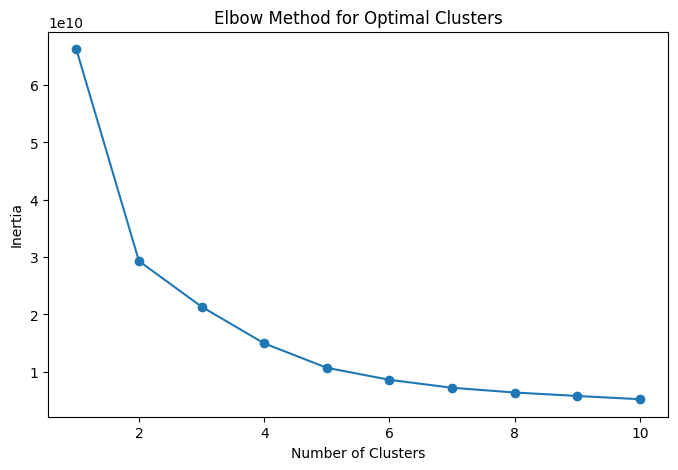

cluster
0    2722
1    2615
3    1820
2    1650
Name: count, dtype: int64


In [26]:

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_imputed)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

optimal_k = 4  

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_imputed)

print(df['cluster'].value_counts())


In [27]:

def recommend_by_cluster(title, df):
    movie_cluster = df[df['title'].str.lower() == title.lower()]['cluster'].values[0]
    similar_movies = df[df['cluster'] == movie_cluster]['title'].tolist()
    similar_movies.remove(title)  
    return similar_movies[:10]

movie_name = "Breaking Bad"
recommendations = recommend_by_cluster(movie_name, df)

print(f"Movies similar to '{movie_name}':")
print(recommendations)


Movies similar to 'Breaking Bad':
['Blood & Water', 'Midnight Mass', 'Jaguar', 'Resurrection: Ertugrul', 'Love on the Spectrum', 'Minsara Kanavu', 'Dark Skies', 'Chicago Party Aunt', 'Sex Education', 'Tayo and Little Wizards']


In [28]:

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

silhouette_avg = silhouette_score(X_imputed, df['cluster'])
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.417007694100655


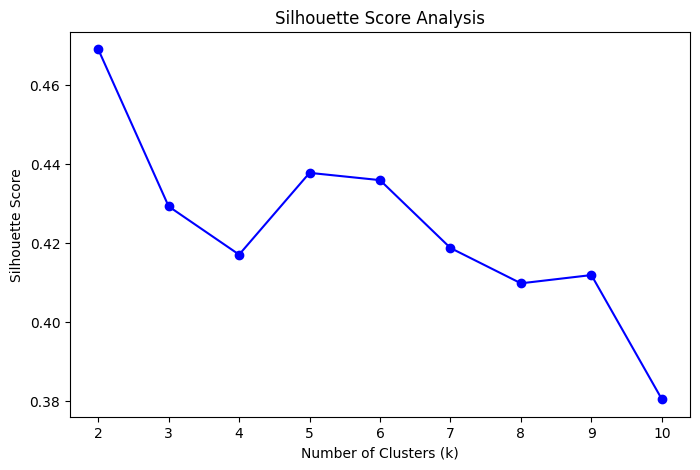

Optimal number of clusters based on Silhouette Score: 2


In [29]:
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_imputed)
    score = silhouette_score(X_imputed, cluster_labels)
    silhouette_scores.append(score)


plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()

optimal_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k}")


In [30]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_imputed)

print("Clustering completed. Cluster distribution:")
print(df['cluster'].value_counts())


Clustering completed. Cluster distribution:
cluster
1    2078
2    1897
3    1675
4    1648
0    1509
Name: count, dtype: int64


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, df['rating'], test_size=0.2, random_state=42)


model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear') 
])


model.compile(optimizer='adam', loss='mse', metrics=['mae'])


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


y_pred = model.predict(X_test).flatten()

c:\Users\sravan\Downloads\college major project\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 30795.8320 - mae: 112.9571 - val_loss: 277.4259 - val_mae: 15.0111
Epoch 2/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1724.9209 - mae: 31.4331 - val_loss: 97.9686 - val_mae: 7.1893
Epoch 3/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 780.2553 - mae: 21.2128 - val_loss: 42.8106 - val_mae: 5.4395
Epoch 4/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 470.8231 - mae: 16.5166 - val_loss: 96.0843 - val_mae: 8.1799
Epoch 5/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 291.2080 - mae: 12.7582 - val_loss: 18.3731 - val_mae: 3.5431
Epoch 6/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 167.3539 - mae: 9.6535 - val_loss: 19.9402 - val_mae: 3.5389
Epoch 7/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 110.3256 - mae: 7.6721 - val_loss: 30.3409 - val_mae: 4.5094
Epoch 8/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 66.5137 - mae: 6.0389 - val_loss: 11.2151 - val_mae: 2.6905
Epoch 9/50
221/221 ━━━

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\n--- Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


--- Model Performance ---
Mean Absolute Error (MAE): 0.9842
Mean Squared Error (MSE): 1.5226


In [33]:
import joblib

# Save the trained model
joblib.dump(model, 'trained_model.pkl')

# Later, load the model
model = joblib.load('trained_model.pkl')


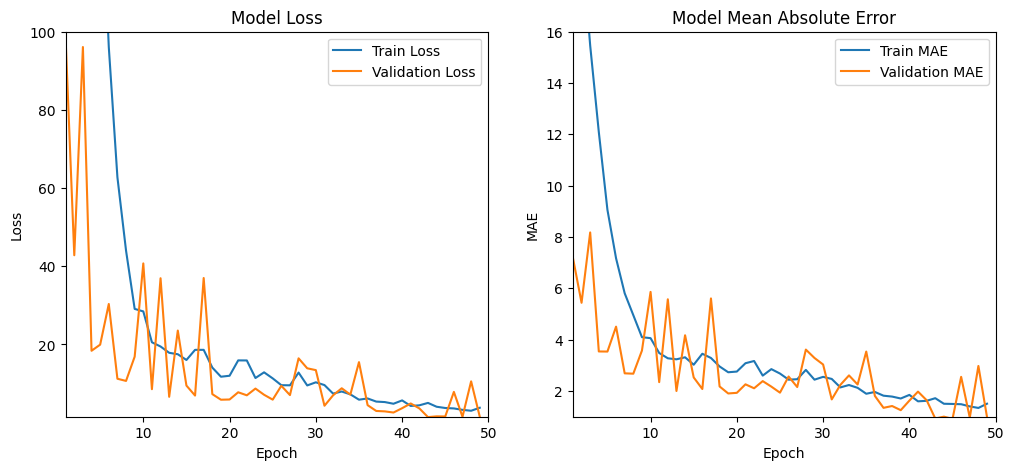

In [34]:

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(1.5, 100)  # Adjust y-axis range based on plausible loss values
plt.xlim(1, len(history.history['loss']))

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.ylim(1, 16)  # Adjust y-axis range based on MAE values
plt.xlim(1, len(history.history['mae'])) 

plt.show()

10:36:59 - cmdstanpy - INFO - Chain [1] start processing
10:37:00 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\sravan\Downloads\college major project\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


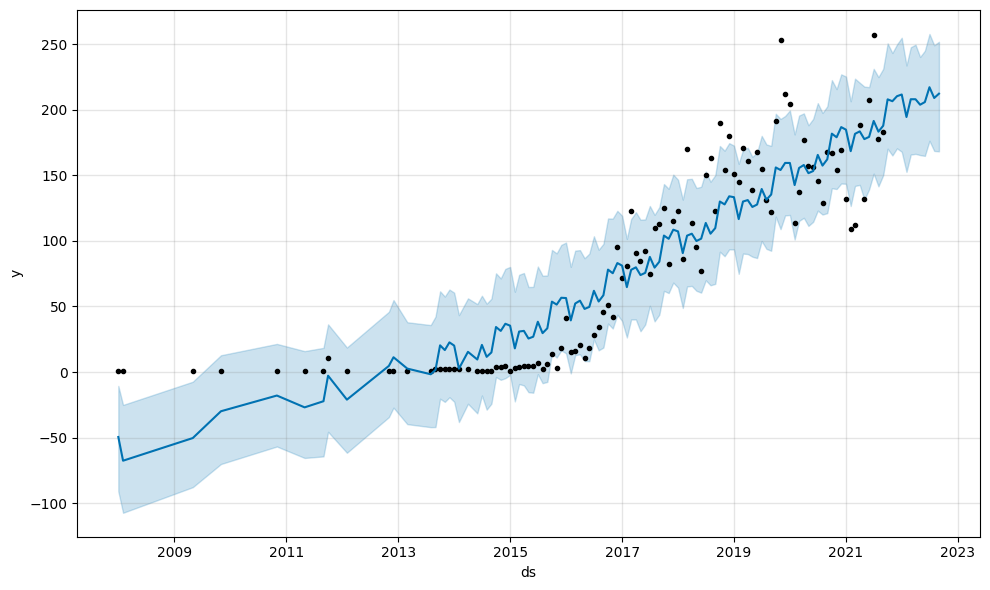

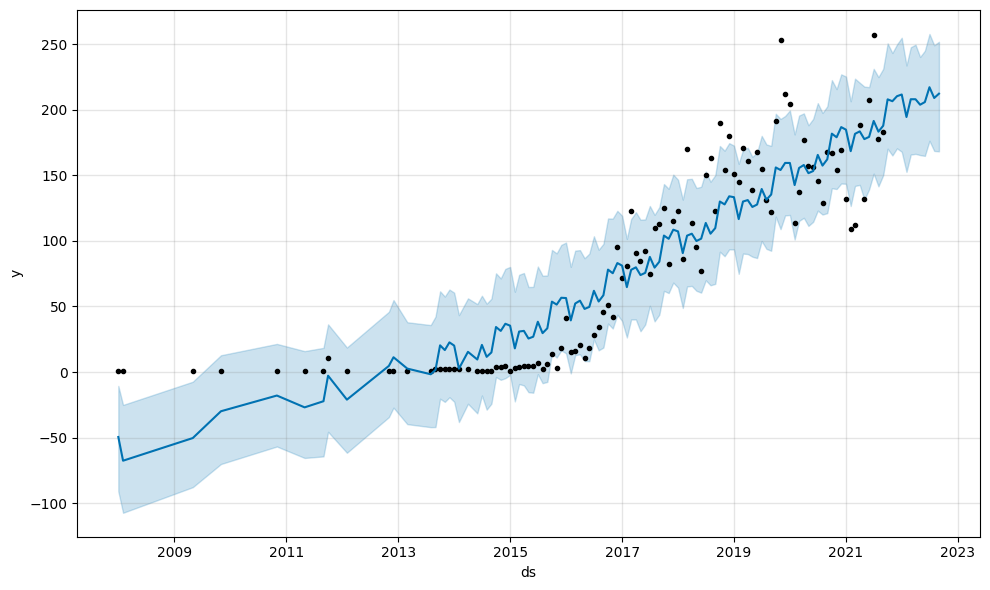

In [35]:

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_month'] = df['date_added'].dt.to_period('M').astype(str)


df_forecast = df.groupby('year_month').size().reset_index(name='count')
df_forecast.columns = ['ds', 'y']


df_forecast = df_forecast.dropna(subset=['ds'])


df_forecast = df_forecast[df_forecast['ds'] != 'NaT']


prophet_model = Prophet()
prophet_model.fit(df_forecast)


future = prophet_model.make_future_dataframe(periods=12, freq='M')
forecast = prophet_model.predict(future)


prophet_model.plot(forecast)


In [36]:

df['listed_in'] = df['listed_in'].fillna('Unknown').astype(str)


print("Unique genres:", df['listed_in'].unique()[:10])

Unique genres: ['274' '414' '242' '297' '393' '499' '121' '319' '114' '197']


In [40]:

df['decoded_genre'] = encoder.inverse_transform(df['listed_in'].astype(int))

def get_unique_genres(df):
    genre_list = df['decoded_genre'].astype(str).str.split(',').explode().str.strip().unique()
    unique_genres = sorted(set(genre_list))
    
    return unique_genres

def recommend_movies(df, top_n=5):
    available_genres = get_unique_genres(df)
    print("\nAvailable genres:\n")
    for genre in available_genres:
        print(f"- {genre}")

    genre_inputs = input("\nEnter your preferred genres (e.g., Comedy, Action, Drama): ").strip()

    genre_list = [genre.strip().lower() for genre in genre_inputs.split(',')]

    matched_genres = []
    for genre in genre_list:
        best_match, score = process.extractOne(genre, available_genres)
        if score > 80:
            matched_genres.append(best_match)

    if not matched_genres:
        print("\nNo matching genres found. Please try again with the available genres.")
        return

    print(f"\nMatched genres: {', '.join(matched_genres)}")

    genre_df = df[df['decoded_genre'].astype(str).apply(lambda x: any(g.lower() in x.lower() for g in matched_genres))]

    if genre_df.empty:
        print("\nNo movies found for the selected genres.")
        return

    top_movies = genre_df.sort_values(by='rating', ascending=False).head(top_n)

    print(f"\nTop {top_n} movies for genres {', '.join(matched_genres)}:\n")
    for _, row in top_movies.iterrows():
        print(f"Title: {row['title']}, Genres: {row['decoded_genre']}, Rating: {row['rating']}")

    additional_genres = set()
    for genres in top_movies['decoded_genre'].astype(str):
        genres_list = [genre.strip().lower() for genre in genres.split(',')]
        additional_genres.update(genres_list)

    if additional_genres:
        print("\nYou may also like movies from these genres:", additional_genres)
    else:
        print("\nNo additional genre recommendations found.")

print("\n--- Netflix Movie Recommendation System ---")
recommend_movies(df)



--- Netflix Movie Recommendation System ---

Available genres:

- Action & Adventure
- Anime Features
- Anime Series
- British TV Shows
- Children & Family Movies
- Classic & Cult TV
- Classic Movies
- Comedies
- Crime TV Shows
- Cult Movies
- Documentaries
- Docuseries
- Dramas
- Faith & Spirituality
- Horror Movies
- Independent Movies
- International Movies
- International TV Shows
- Kids' TV
- Korean TV Shows
- LGBTQ Movies
- Movies
- Music & Musicals
- Reality TV
- Romantic Movies
- Romantic TV Shows
- Sci-Fi & Fantasy
- Science & Nature TV
- Spanish-Language TV Shows
- Sports Movies
- Stand-Up Comedy
- Stand-Up Comedy & Talk Shows
- TV Action & Adventure
- TV Comedies
- TV Dramas
- TV Horror
- TV Mysteries
- TV Sci-Fi & Fantasy
- TV Shows
- TV Thrillers
- Teen TV Shows
- Thrillers

Matched genres: Stand-Up Comedy, Horror Movies, Action & Adventure

Top 5 movies for genres Stand-Up Comedy, Horror Movies, Action & Adventure:

Title: You Don't Mess with the Zohan, Genres: Action & 